## 라이브러리 불러오기

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 데이터 불러오기

In [111]:
train = pd.read_csv("train.csv")

In [5]:
test = pd.read_csv("test.csv")

In [6]:
sub = pd.read_csv("sample_submission.csv")

### 데이터 컬럼이 갖고 있는 의미 

In [ ]:
"""
PassengerId - 승객의 고유 ID
HomePlanet - 거주하고 있는 행성(또는 출발한 행성)
CryoSleep - 냉동수면 여부
Cabin - 객실 정보(구역/번호/방향)
Destination - 목적지
Age - 나이 
VIP - VIP 티켓 여부
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 선박 내에서 편의시설을 이용한 금액
Name - 승객 이름
"""

## 데이터 구조 살펴보기

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [10]:
print(train.shape)
print(test.shape)
print(sub.shape)

(8693, 14)
(4277, 13)
(4277, 2)


## EDA

In [19]:
obj_col = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]

In [20]:
for col in obj_col :
    print(train[col].unique())

['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
['Europa' 'Earth' 'Mars' nan]
[False True nan]
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
[False True nan]


In [227]:
train["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [225]:
train[train["CryoSleep"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group_id,customer_id,first_name,last_name,count,Family
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True,0099,02,Thewis,Connelson,2,1
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False,0105,01,Carry,Cleachrand,1,0
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False,0110,02,Aldeba,Bootious,4,1
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True,0115,01,Rohs,Pead,1,0
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True,0173,01,Hilip,Grifford,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True,9197,01,Bellus,Platch,4,1
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False,9227,05,Hard,Hinglendez,5,1
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9246,01,NaN,NaN,1,0
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,9259,01,Annah,Gilleyons,1,0


In [65]:
train[(train["PassengerId"].str[:4] == train["fam_id"]) & (train["PassengerId"].str.contains("_02")) ].isnull().sum()

PassengerId      0
HomePlanet      36
CryoSleep       42
Cabin           35
Destination     28
Age             38
VIP             31
RoomService     29
FoodCourt       30
ShoppingMall    33
Spa             24
VRDeck          28
Name            40
Transported      0
fam_id           0
dtype: int64

In [29]:
train["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [27]:
train.groupby(["HomePlanet","Transported"])["Transported"].count()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
Name: Transported, dtype: int64

In [25]:
train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [32]:
train[train["HomePlanet"] == "Earth"].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True


In [37]:
train[train["HomePlanet"].isnull()]["Transported"].value_counts()

True     103
False     98
Name: Transported, dtype: int64

#### 공동 구성원
- PassengerID의 앞 4자리가 같으면서 1부터 8중 포함되는 구성원은 공동 구성원으로 한다 


In [220]:
train["CryoSleep"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: bool

In [91]:
train.tail(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,fam_id,with_person
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,0
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,9280,1


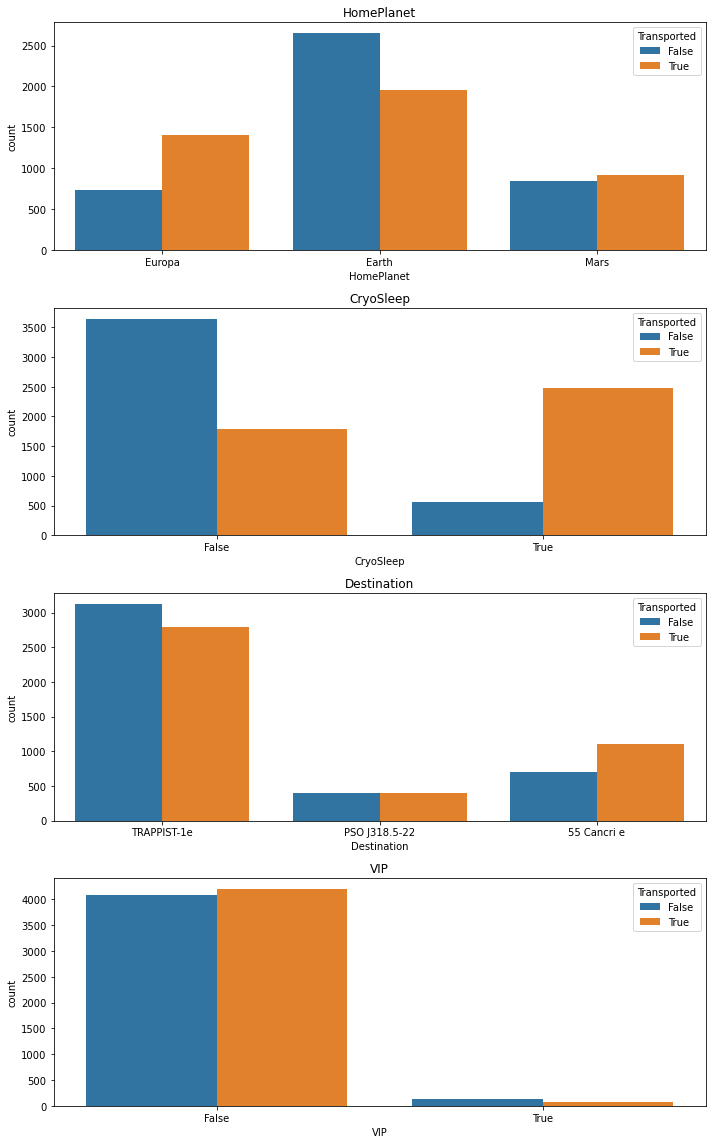

In [33]:
obj=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,16))
for i, j in enumerate(obj):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=j, axes=ax, hue='Transported')
    ax.set_title(j)
fig.tight_layout() 
plt.show()

## 데이터 전처리

#### 승객 고유번호에서 가족인 경우를 고려하여 그룹별 같은 값을 나타낼 수 있는 부분이 있을 것 같아서 원활한 결측치 처리를 하기 위해 파생변수 생성

In [112]:
train[["group_id", "customer_id"]] = train['PassengerId'].str.split('_', 1, expand = True)

In [118]:
train[["first_name", "last_name"]] = train["Name"].str.split(" ", expand = True)

#### 같이 온 구성원이 있는 승객의 고유번호를 gggg_pp 중에서 pp가 01이 아닌 다른 수치라면 구성원일 것이라는 판단으로 파생변수로 구성원 여부 컬럼 생성

In [88]:
train["with_person"] = np.where((train["PassengerId"].str[:4] == train["fam_id"] ) & (train["PassengerId"] != train["fam_id"]+"_01"), 1, 0)

In [127]:
#### 딕셔너리 생성
#### id가 똑같은 값 끼리 join(merge) == on

#### np.where > id.count 가 2 이상이라면 구성원이라고 파생변수 생성

In [193]:
fam = train.groupby("group_id")["customer_id"].count().reset_index()

In [207]:
fam = fam.rename({"fam_id" : "group_id"}, axis = 1)

In [209]:
train = pd.merge(train, fam, on = "group_id")